## Installs and imports

In [ ]:
!pip install --upgrade pip
!pip install sentencepiece
!pip install transformers

In [ ]:
from transformers import AutoTokenizer, AutoModel, AutoConfig
from transformers import AutoModelForSequenceClassification
from torch.utils.data import DataLoader
import numpy as np
from scipy.special import softmax
import pandas as pd

## Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv ('/content/drive/My Drive/PATH_TO_THE_DIRECTORY/filename.csv') # insert your path to the directory and the filename

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (13,37,38,39,40) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df = df.astype(str).applymap(lambda x: x[:514])

dataset = (df['Message'])
print (dataset.head(50))

0     लव जिहाद पर बनी एक छोटी सी फिल्म जरूर देखें 😭😭...
1     अपना वादा पूरा कर दिया दोस्तों, मेरा हर एक भाई...
2     लव जिहाद पर क़ानून..”हिंदू राष्ट्र” की बुनियाद...
3     Chitralekha VS Ankur Arya Debate ।। #कथा_जिहाद...
4     लव जिहाद के खिलाफ 17 तारीख को बीकानेर कोलायत प...
5     'लव जिहाद' की 'पीड़िता' का ABP News पर दावा, गल...
6     लव जिहाद के खिलाफ और बहन बेटियों को जागरूक करन...
7     भक्त कह रहे हैं प्लाट के साथ साथ अब कश्मीरी लड...
8     हर हर महादेव हिंदू के युद्ध गुरु यती नरसिंहानं...
9     Bikaner में लड़की बोली लव जिहाद जैसा कुछ नहीं',...
10    'लव जिहाद' को लेकर छिड़ी बहस के बीच सुन्नी मुस...
11    CM योगी के बाद अनिल विज का ऐलान, हरियाणा सरकार...
12    पटौदी : तथाकथित 'लव जिहाद' का जहां कोई मामला न...
13    वकील लड़कियों ने लव जिहाद पर किया खुलासा, जिंदग...
14    भाजपा के लोग करें तो 'लव' कोई और करे तो 'जिहाद...
15    'लव जिहाद' पर Yogi का करारा 'प्रहार', कहा 'जल्...
16    कानपुर की शालिनी यादव जो फिजा फातिमा बन चुकी ह...
17    #मनीषा_महापंचायत_और_हाईकोर्ट...??? जोधपुर 

In [ ]:
dataset = dataset.dropna().to_list()

## Model

For the github page, visit "XLM-T - A Multilingual Language Model Toolkit for Twitter", https://github.com/cardiffnlp/xlm-t

In [ ]:
CUDA = True # set to true if using GPU (Runtime -> Change runtime Type -> GPU)
BATCH_SIZE = 1

MODEL = "cardiffnlp/twitter-xlm-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL, use_fast=True)
config = AutoConfig.from_pretrained(MODEL) # used for id to label name
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

if CUDA:
  model = model.to('cuda')
_ = model.eval()

The model performs a three label sentiment classification of the texts: positive, neutral, negative. See the earlier (English language only) benchmark model here: https://github.com/cardiffnlp/tweeteval 

## Forward

In [ ]:
def forward(text, cuda=True):
  #text = preprocess(text)
  encoded_input = tokenizer(text, return_tensors='pt', padding=True, truncation=True)
  if cuda:
    encoded_input.to('cuda')
    output = model(**encoded_input)
    scores = output[0].detach().cpu().numpy()
  else:
    output = model(**encoded_input)
    scores = output[0].detach().numpy()
  
  scores = softmax(scores, axis=-1)
  return scores

In [ ]:
print (np.size(dataset))

first_N_messages = dataset [:5000]
print (np.size(first_N_messages))

241441
5000


In [ ]:
dl = DataLoader(first_N_messages, batch_size=BATCH_SIZE)
all_preds = []

for idx, batch in enumerate(dl):
  print('Batch ',idx+1,' of ',len(dl))
  #text = preprocess(batch)
  text = batch
  if (text != "nan"):
    scores = forward(text, cuda=CUDA)
    preds = np.argmax(scores, axis=-1)
    all_preds.extend(preds)

#print (all_preds)

Batch  1  of  5000
Batch  2  of  5000
Batch  3  of  5000
Batch  4  of  5000
Batch  5  of  5000
Batch  6  of  5000
Batch  7  of  5000
Batch  8  of  5000
Batch  9  of  5000
Batch  10  of  5000
Batch  11  of  5000
Batch  12  of  5000
Batch  13  of  5000
Batch  14  of  5000
Batch  15  of  5000
Batch  16  of  5000
Batch  17  of  5000
Batch  18  of  5000
Batch  19  of  5000
Batch  20  of  5000
Batch  21  of  5000
Batch  22  of  5000
Batch  23  of  5000
Batch  24  of  5000
Batch  25  of  5000
Batch  26  of  5000
Batch  27  of  5000
Batch  28  of  5000
Batch  29  of  5000
Batch  30  of  5000
Batch  31  of  5000
Batch  32  of  5000
Batch  33  of  5000
Batch  34  of  5000
Batch  35  of  5000
Batch  36  of  5000
Batch  37  of  5000
Batch  38  of  5000
Batch  39  of  5000
Batch  40  of  5000
Batch  41  of  5000
Batch  42  of  5000
Batch  43  of  5000
Batch  44  of  5000
Batch  45  of  5000
Batch  46  of  5000
Batch  47  of  5000
Batch  48  of  5000
Batch  49  of  5000
Batch  50  of  5000
Batch  51

In [ ]:
print (np.size(all_preds))

5000


In [ ]:
print (all_preds)

[1, 1, 1, 1, 1, 0, 2, 1, 2, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 2, 0, 0, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 1, 0, 0, 1, 0, 2, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 2, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 2, 0, 0, 0, 0, 2, 0, 1, 1, 2, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 2, 2, 0, 0, 1, 0, 2, 1, 1, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 2, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 2, 1, 2, 1, 1, 0, 0, 0, 0, 2, 0, 0, 1, 0, 1, 0, 1, 0, 2, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 2, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 

In [ ]:
print ("(0, 1, 2) predicted scores correspond to:") 
config.id2label[0], config.id2label[1], config.id2label[2]

(0, 1, 2) predicted scores correspond to:


('Negative', 'Neutral', 'Positive')

In [ ]:
for example in range(np.size(first_N_messages)):
  pred = all_preds[example]
  print(first_N_messages[example], '--->', config.id2label[pred])

लव जिहाद पर बनी एक छोटी सी फिल्म जरूर देखें 😭😭😭😭😭😭😭😭😭😭😭😭😭😭 ---> Neutral
अपना वादा पूरा कर दिया दोस्तों, मेरा हर एक भाई ,बहन इस वीडियो को देखने से पहले ही ,शेयर करेगा उन्होंने आश्रम बनाई, मिर्जापुर बनाई, शंकर भगवान को टॉयलेट में दिखाया, और ना जाने लव जिहाद को प्रमोट करते हुए, कितनी मूवी बनाई आपके भाई ने, कम समय में, स्वयं का पैसा खर्च करते हुए, बहुत कुछ दिखाने की कोशिश की है इस वीडियो को अपने अकाउंट से शेयर करने के साथ-साथ, डाउनलोड करके, अपने हर अकाउंट से ,अपलोड भी करते रहो मैं वादा करता हूं, अगर आपने इसको अच्छा रिस्पांस दिया तो , 6 महीने बाद, एक ऐसा प्रोजेक्ट लेकर आऊंगा कि ,गद्दा ---> Neutral
लव जिहाद पर क़ानून..”हिंदू राष्ट्र” की बुनियाद का पहला पत्थर..? देखें वीडियो 👉 youtu.be/sKAQLTqpwEo:=:https://www.youtube.com/watch?v=sKAQLTqpwEo&feature=youtu.be ---> Neutral
Chitralekha VS Ankur Arya Debate ।। #कथा_जिहाद ।। चित्रलेखा VS अंकुर आर्य डिबेट, त्रिनेत्र -Trinetra Link: https://youtu.be/pyaq8nKahhs:=:https://www.youtube.com/watch?v=pyaq8nKahhs&feature=youtu.be ====================== #च

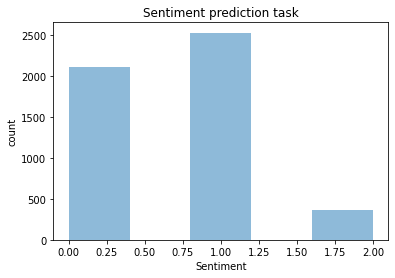

In [ ]:
from matplotlib import pyplot as plt

plt.hist(all_preds, bins=5, alpha=0.5)

plt.title('Sentiment prediction task')
plt.xlabel('Sentiment')
plt.ylabel('count')
plt.show()